# Prétraitement de données

> L'objectif de ce notebook, correspondant au premier chapitre du cours de Machine learning, est de faire le point des différentes étapes de la procédure du prétraitement de données, à savoir :

1.   Importation
2.   Nettoyage
3.   Transformation
4.   Visualisation

In [ ]:
import csv
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from random import randint
from random import shuffle
from sklearn import datasets as ds
from json import dump, dumps, load
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

### 1. Importation

#### 1.1 Description

In [ ]:
titanic = fetch_openml(name = 'titanic', version=1)
print(titanic.DESCR)

**Author**: Frank E. Harrell Jr., Thomas Cason  
**Source**: [Vanderbilt Biostatistics](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html)  
**Please cite**:   

The original Titanic dataset, describing the survival status of individual passengers on the Titanic. The titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.

Thomas Cason of UVa has greatly updated and improved the titanic data frame using the Encyclopedia Titanica and created the dataset here. Some duplicate passengers have been dropped, many errors corrected, many missing ages filled in, and new variable

In [ ]:
titanic.frame

,0
Class,float64
Age,float64
Sex,float64
class,category


In [ ]:
titanic.frame.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
print(titanic.feature_names)

['Class', 'Age', 'Sex']


> -   ticket : numéro du billet.
-   cabin : numéro de cabine.
-   home.dest : destination prévue.
-   fare : tarif payé par le passager.
-   survived : passager a survécu (1) ou non (0).
-   boat : numéro du canot de sauvetage des survécus.
-   body : numéro d'identification du corps d'un passager décédé.
-   parch : nombre de parents/enfants à bord pour un passager donné.
-   pclass : classe du billet du passager, (1, 2 ou 3), reflètant son statut socio-économique.
-   sibsp : (siblings/spouses) : nombre de frères/sœurs/conjoints présents à bord pour un passager donné.
-   embarked : le port où le passager est monté à bord du Titanic : C (Cherbourg), Q (Queenstown) et S (Southampton).

In [ ]:
titanic.frame.head(3)

,Class,Age,Sex,class
0,-1.870,-0.228,0.521,-1
1,-0.923,-0.228,-1.920,1
2,-0.923,-0.228,-1.920,1


In [ ]:
titanic.data.head(3)

,Class,Age,Sex
0,-1.870,-0.228,0.521
1,-0.923,-0.228,-1.920
2,-0.923,-0.228,-1.920


In [ ]:
titanic.target

,class
0,-1
1,1
2,1
3,1
4,-1
...,...
2196,-1
2197,-1
2198,-1
2199,-1


In [ ]:
print(dumps(titanic.details, indent=1))

{
 "id": "40945",
 "name": "Titanic",
 "version": "1",
 "description_version": "9",
 "format": "ARFF",
 "upload_date": "2017-10-16T01:17:36",
 "licence": "Public",
 "url": "https://api.openml.org/data/v1/download/16826755/Titanic.arff",
 "parquet_url": "https://openml1.win.tue.nl/datasets/0004/40945/dataset_40945.pq",
 "file_id": "16826755",
 "default_target_attribute": "survived",
 "tag": [
  "Computational Universe",
  "Manufacturing",
  "text_data"
 ],
 "visibility": "public",
 "minio_url": "https://openml1.win.tue.nl/datasets/0004/40945/dataset_40945.pq",
 "status": "active",
 "processing_date": "2018-10-04 07:19:36",
 "md5_checksum": "60ac7205eee0ba5045c90b3bba95b1c4"
}


In [ ]:
print(titanic.url)

https://www.openml.org/d/40945


In [ ]:
dataset = pd.DataFrame(titanic.frame)
dataset.dtypes

,0
pclass,int64
survived,category
name,object
sex,category
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,object


In [ ]:
dataset.head(3)

NameError: name 'dataset' is not defined

In [ ]:
dataset.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


#### 1.2 Téléchargement

In [ ]:
!wget 'https://drive.google.com/uc?id=10fXGoG6-12qHgmOasQ4830Ph0i65UmCE&export=download' -O 'titanic.csv'

--2024-12-10 18:24:54--  https://drive.google.com/uc?id=10fXGoG6-12qHgmOasQ4830Ph0i65UmCE&export=download
Resolving drive.google.com (drive.google.com)... 172.217.0.78, 2607:f8b0:4025:810::200e
Connecting to drive.google.com (drive.google.com)|172.217.0.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=10fXGoG6-12qHgmOasQ4830Ph0i65UmCE&export=download [following]
--2024-12-10 18:24:55--  https://drive.usercontent.google.com/download?id=10fXGoG6-12qHgmOasQ4830Ph0i65UmCE&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.7.33, 2607:f8b0:4025:811::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.7.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105631 (103K) [application/octet-stream]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>] 103.16K  --.-KB/s    in 0.03s   

2024

#### 1.3 Chargement

In [ ]:
dataset = pd.read_csv('titanic.csv')
dataset.head(3)

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,0,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 1.4 Fractionnement

##### 1.4.1 Fractionnement via sklearn

In [ ]:
data, labels = fetch_openml('titanic', version = 1, as_frame = True, parser = 'auto', return_X_y = True)
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.3)

In [ ]:
train_data.head(3)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
725,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.75,NaN,Q,13,NaN,Ireland
638,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.05,NaN,S,NaN,NaN,NaN
324,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C,10,NaN,"Russia New York, NY"


In [ ]:
test_data.head(3)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
757,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S,16,NaN,"Liverpool, England Bedford, OH"
267,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C,NaN,NaN,"St James, Long Island, NY"
758,3,"de Messemaeker, Mr. Guillaume Joseph",male,36.5,1,0,345572,17.4000,NaN,S,15,NaN,"Tampico, MT"


In [ ]:
# supprimer return_X_y = True puis compiler. D'où vient l'erreur ?
# proposer un code équivalent sans utiliser return_X_y
# afficher les trois prmières lignes de train_data et train_labels

##### 1.4.2 Fractionnement manuel

In [ ]:
x = [1, 0, -9, 5, 8, 10]
x[4:7]

In [ ]:
len(labels)

In [ ]:
range(10)

In [ ]:
def custom_split(data, labels, test_size):
    indices = list(range(len(data)))
    shuffle(indices)

    index_size = int(len(data) * test_size)

    test_indices = indices[:index_size]
    train_indices = indices[index_size:]

    train_data = data.iloc[train_indices]
    train_labels = labels.iloc[train_indices]

    test_data = data.iloc[test_indices]
    test_labels = labels.iloc[test_indices]

    return train_data, test_data, train_labels, test_labels

In [ ]:
train_data, test_data, train_labels, test_labels = custom_split(dataset.drop(columns=['survived']),
                                                                dataset['survived'],
                                                                test_size=0.2)

In [ ]:
train_data.head(3)

,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
626,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S,NaN,NaN,"Vadsbro, Sweden Ministee, MI"
1039,3,"Mullens, Miss. Katherine 'Katie'",female,NaN,0,0,35852,7.7333,NaN,Q,16,NaN,NaN
991,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,15,NaN,NaN


In [ ]:
train_labels.head(3)

,survived
626,0
1039,1
991,1


In [ ]:
# vérifier la longueur de chaque élément

### 2. Nettoyage

#### 2.1 Valeurs répétées

In [ ]:
def add_duplicates(dataset, percentage):
    duplicates = dataset.sample(n=int(percentage * len(dataset)))
    return pd.concat([dataset, duplicates], ignore_index=True)

In [ ]:
dataset_with_duplicates = add_duplicates(dataset, 0.05)
print(len(dataset_with_duplicates))

1374


In [ ]:
dataset_with_duplicates.duplicated().sum()

65

In [ ]:
dataset_without_duplicates = dataset_with_duplicates.drop_duplicates()

In [ ]:
dataset_without_duplicates.duplicated().sum()

0

#### 2.2 Valeurs aberrantes

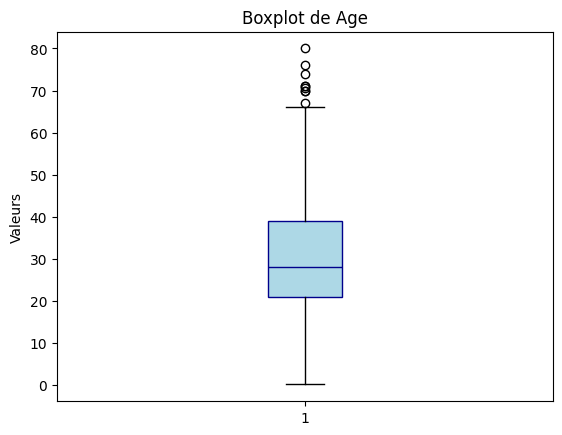

In [ ]:
titanic = fetch_openml(name='titanic', version=1, as_frame=True)
age_data = titanic.frame['age'].dropna()
plt.boxplot(age_data, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="darkblue"),
            medianprops=dict(color="darkblue"))
plt.title(f"Boxplot de {'age'.capitalize()}")
plt.ylabel("Valeurs")
plt.show()

##### 2.2.1 Normalisation

In [ ]:
normalized_age = MinMaxScaler().fit_transform(dataset['age'].values.reshape(-1, 1))
normalized_age_df = pd.DataFrame(normalized_age, columns=['age normalisé'])

ages = pd.concat([dataset['age'], normalized_age_df], axis=1)
ages.head(10)

In [ ]:
scaler = RobustScaler(quantile_range=(25, 75))
age_data = dataset['age'].values.reshape(-1, 1)

robust_normalized_age = scaler.fit_transform(age_data)
robust_normalized_age_df = pd.DataFrame(robust_normalized_age, columns=['age normalisé'])

ages = pd.concat([dataset['age'], robust_normalized_age_df], axis=1)
ages.head(10)

##### 2.2.2 Suppression

In [ ]:
X =  dataset.dropna(subset=['age'])[['age']]
warnings.filterwarnings('ignore') # default

outlier_detection = IsolationForest(contamination=0.05, random_state=42)
outliers = outlier_detection.fit_predict(X)

is_inlier = outliers != -1
# cleaned_data = dataset[is_inlier]
# cleaned_data

In [ ]:
outlier_indices = np.where(outliers == -1)
print('Nombre de valeurs abberantes:', len(outlier_indices[0]))

In [ ]:
aberrant_data = dataset.iloc[outlier_indices]
aberrant_data.columns = dataset.columns
aberrant_data.head(10)

#### 2.3 Valeurs manquantes

##### 2.3.1 Statistiques

In [ ]:
dataset.isnull().any()

,0
survived,False
pclass,False
name,False
gender,False
age,True
sibsp,False
parch,False
ticket,False
fare,True
cabin,True


In [ ]:
dataset.isnull().sum()

,0
survived,0
pclass,0
name,0
gender,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


In [ ]:
missing_data_percentage = dataset.isnull().sum() / len(dataset) * 100

In [ ]:
sorted_missing_data_percentage = missing_data_percentage.sort_values(ascending=True)
sorted_missing_data_percentage = sorted_missing_data_percentage[sorted_missing_data_percentage != 0]
sorted_missing_data_percentage

,0
fare,0.076394
embarked,0.152788
age,20.091673
home.dest,43.086325
boat,62.872422
cabin,77.463713
body,90.756303


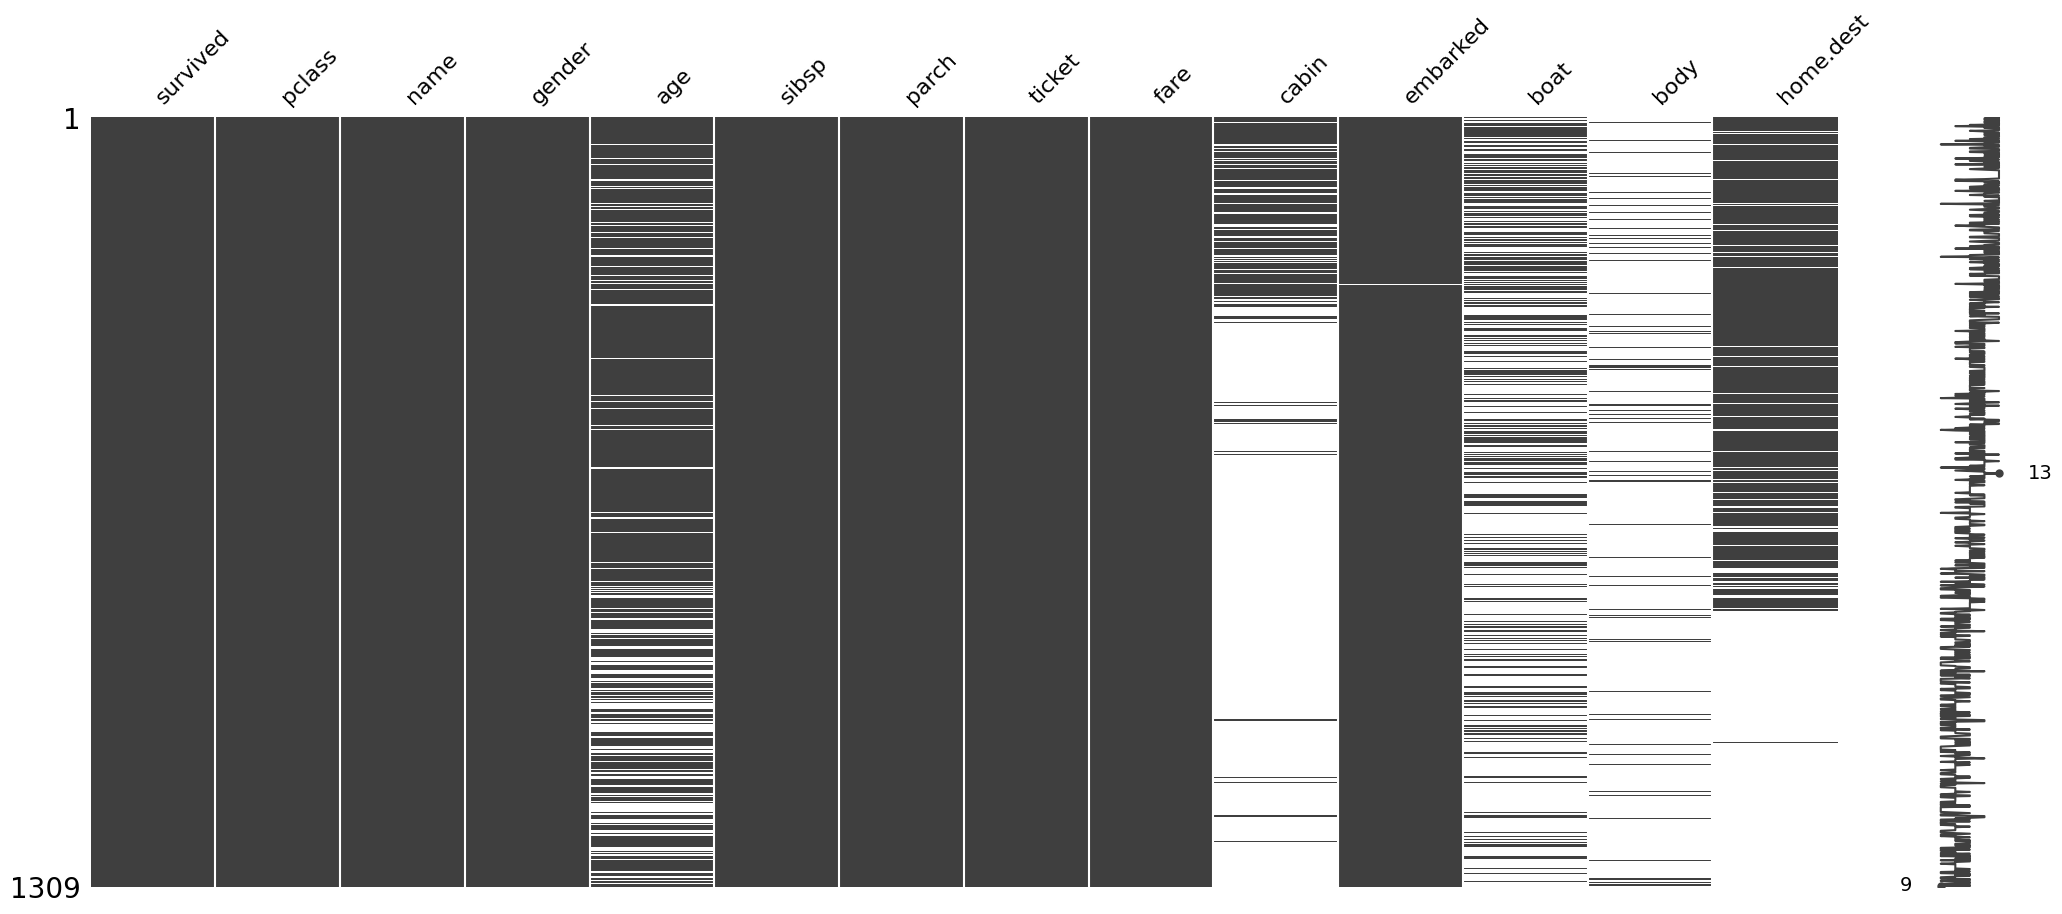

In [ ]:
msno.matrix(dataset)
plt.show()

##### 2.3.2 Imputation

In [ ]:
dataset[dataset['fare'].isna()]

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


In [ ]:
third_pclass = dataset[dataset['pclass'] == 3]
third_pclass_mean_value = third_pclass['fare'].mean()
third_pclass_mean_value

13.302888700564973

In [ ]:
dataset.loc[dataset['fare'].isna(), 'fare'] = third_pclass_mean_value

In [ ]:
dataset[dataset['fare'].isna()]

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [ ]:
dataset[dataset['fare'] == 13.302888700564973]

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,13.302889,NaN,S,NaN,261.0,NaN


##### 2.3.3 Suppression

In [ ]:
dataset['body'].isnull().sum()

1188

In [ ]:
dataset = dataset.dropna(subset=['body'])

In [ ]:
dataset['body'].isnull().sum()

0

### 3. Transformation

#### 3.1 Transtypage

Arrondissement des tarifs de valeurs réelles à des valeurs entières.

In [ ]:
type_casting_of_age = dataset.copy()
type_casting_of_age['fare'] = dataset['fare'].astype(int)
type_casting_of_age.head(3)

Conversion des valeurs d'une variable qualitative nominale en variable quantitative discrète.

In [ ]:
type_casting_of_gender = dataset.copy()
type_casting_of_gender['is_male'] = dataset['gender'].map( {'male': 1, 'female': 0} ).astype(int)
type_casting_of_gender.head(3)

#### 3.2 Encodage

One-hot (1 parmi n)

In [ ]:
one_hot_encoding = pd.get_dummies(dataset, columns=['gender'])
one_hot_encoding.head(3)

#### 3.3 Concaténation

In [ ]:
dataset['family_size'] = dataset['sibsp'] + dataset['parch']
print(dataset[['sibsp','parch','family_size', 'survived']].groupby(['family_size']).mean().sort_values(by = 'family_size'))

#### 3.4 Format

In [ ]:
def csv_to_json(csv_file, json_file):
  # Extraire les données du fichier CSV
  with open(csv_file, 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    data = []
    for row in csv_reader:
      data.append(row)

  # Sauvegarder les données sous format JSON
  with open(json_file, 'w') as jf:
    dump(data, jf, indent=4)

In [ ]:
csv_to_json('titanic.csv', 'titanic.json')

In [ ]:
with open('titanic.json', 'r') as json_file:
    data = load(json_file)

if data:
    print(dumps(data[0], indent=3))
else:
    print("Le fichier JSON est vide ou n'a pas été correctement chargé.")

#### 3.5 Redimensionnement

In [ ]:
mnist = ds.fetch_openml('mnist_784', parser='auto')
images, labels = mnist.data, mnist.target

In [ ]:
print('Shapes : images=%s, labels=%s' % (images.shape, labels.shape))

In [ ]:
print(labels)
# print(labels.to_string())

In [ ]:
images = images.values.astype('int').reshape(70000, 28, 28)
print(f'Images shape = {images.shape}')

In [ ]:
plt.imshow(images[0], cmap = 'gray')
plt.axis('off')
plt.show()

In [ ]:
df = pd.DataFrame(images[0])
print(df.to_string())

In [ ]:
def randomIndices(start, end, length):
  l = []
  for i in range(length):
      l.append(randint(start, end - 1))
  return l

In [ ]:
fig, axes = plt.subplots(10, 10, figsize = (20, 20))
fig.set_facecolor('#ffb22095')

for i, ax in zip(randomIndices(0, len(images), 100), axes.flat):
    ax.axis('off')
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: %s' % labels[i])

### 4. Visualisation

In [ ]:
dataset